# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Cleaned_data.xlsx")        # using cleaned dataset for EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1330 non-null   int64         
 1   Region          1330 non-null   object        
 2   Country         1330 non-null   object        
 3   Item_Type       1330 non-null   object        
 4   Sales_Channel   1330 non-null   object        
 5   Order_Priority  1330 non-null   object        
 6   Order_Date      1330 non-null   datetime64[ns]
 7   Order_ID        1330 non-null   int64         
 8   Ship_Date       1330 non-null   datetime64[ns]
 9   Units_Sold      1330 non-null   int64         
 10  Unit_Price      1330 non-null   float64       
 11  Unit_Cost       1330 non-null   float64       
 12  Total_Revenue   1330 non-null   float64       
 13  Total_Cost      1330 non-null   float64       
 14  Total_Profit    1330 non-null   float64       
 15  Ship

## Finding the basic statistics and distribution of the key numerical columns.

In [4]:
df.describe()    # checking the basic statistics

,Unnamed: 0,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit,Shipping_Days
count,1330.000000,1330,1.330000e+03,1330,1330.000000,1330.000000,1330.000000,1.330000e+03,1.330000e+03,1.330000e+03,1330.000000
mean,664.500000,2013-10-12 06:09:12.180451072,5.412048e+08,2013-11-06 00:46:33.383458816,4949.114286,264.893541,187.246812,1.198856e+06,7.864128e+05,3.679523e+05,24.775940
min,0.000000,2010-01-01 00:00:00,1.006406e+08,2010-01-10 00:00:00,2.000000,9.330000,6.920000,5.038200e+02,3.736800e+02,1.301400e+02,0.000000
25%,332.250000,2011-12-16 06:00:00,3.190004e+08,2012-01-03 00:00:00,2360.750000,81.730000,35.840000,2.661169e+05,1.577943e+05,8.482294e+04,12.000000
50%,664.500000,2013-10-17 00:00:00,5.387164e+08,2013-11-09 00:00:00,4958.000000,154.060000,97.440000,7.613049e+05,4.332233e+05,2.735946e+05,25.000000
75%,996.750000,2015-08-28 18:00:00,7.544628e+08,2015-10-03 18:00:00,7458.750000,437.200000,263.330000,1.742756e+06,1.108362e+06,5.476582e+05,37.000000
max,1329.000000,2017-07-23 00:00:00,9.998797e+08,2017-08-31 00:00:00,9999.000000,668.270000,524.960000,3.957714e+06,2.534214e+06,1.241911e+06,50.000000
std,384.082239,NaN,2.573882e+08,NaN,2904.105430,217.323460,176.158873,1.224387e+06,8.377880e+05,3.421689e+05,14.577915


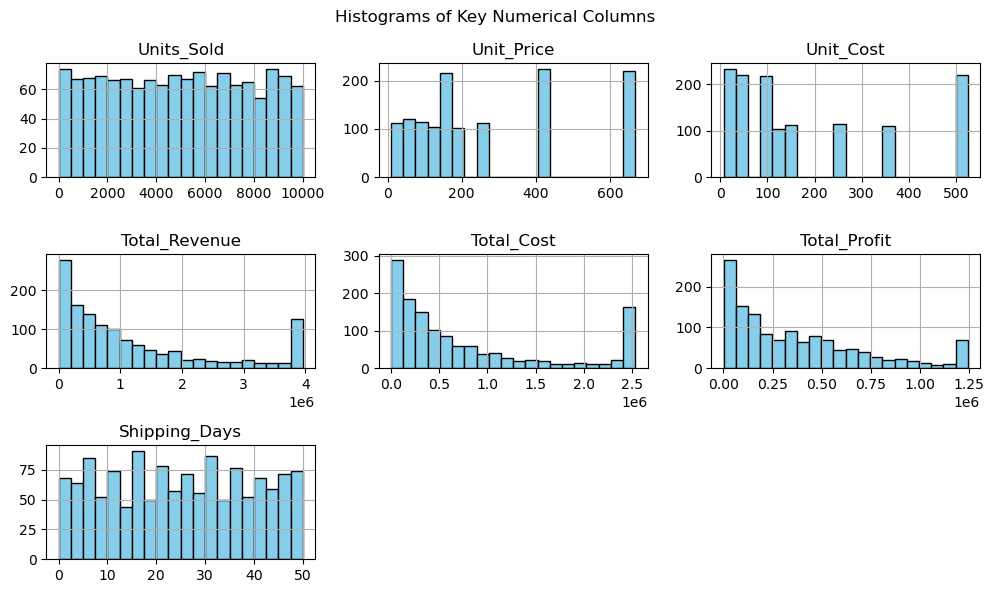

In [6]:
# Display histograms for visualising data distribution 
import matplotlib.pyplot as plt                      # library for visualization


df[['Units_Sold', 'Unit_Price','Unit_Cost','Total_Revenue',
    'Total_Cost', 'Total_Profit','Shipping_Days']].hist(bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')


plt.suptitle("Histograms of Key Numerical Columns")
plt.tight_layout()
plt.show()


### Note: 

Histograms helps me to visualize the spread and distribution, showing skewness or any potential outliers.

# Finding the trend of Total_Revenue over time. (Order_Date col)

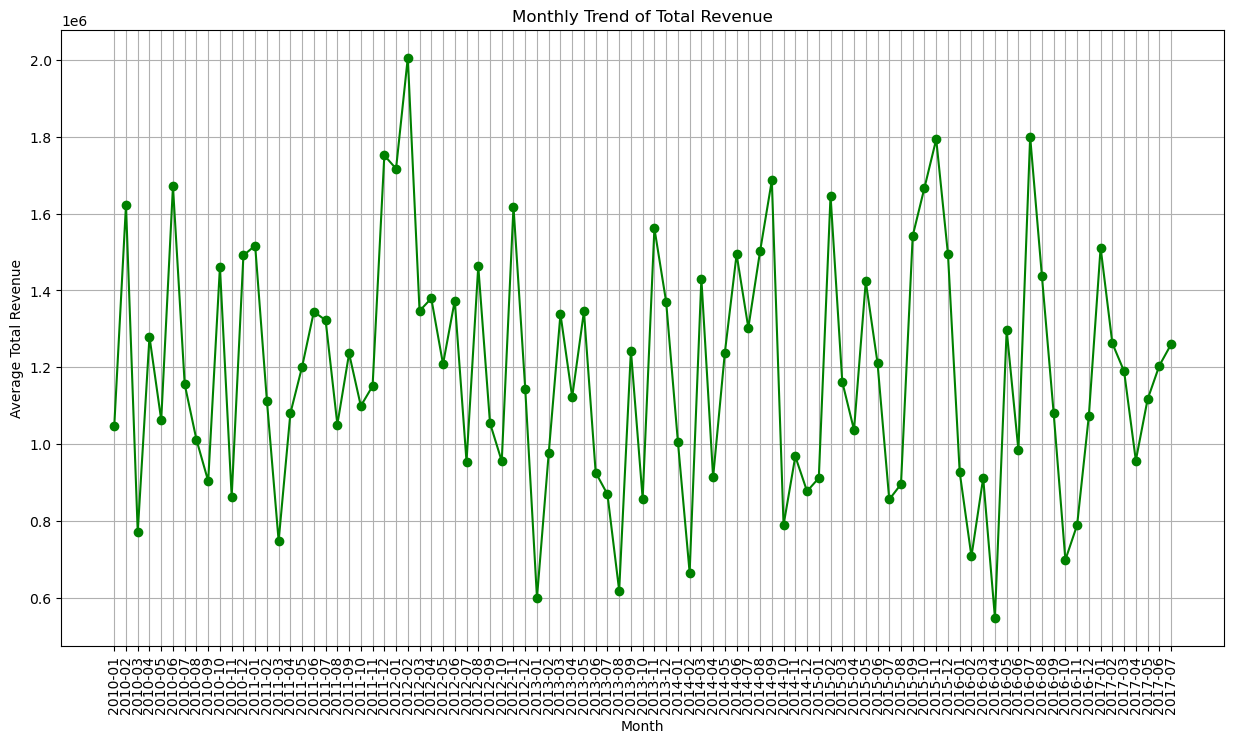

In [7]:
# Grouping data by month and calculating average of Total Revenue

revenue_trend = df.groupby(df['Order_Date'].dt.to_period('M'))['Total_Revenue'].mean()

# Plotting the trend of Total Revenue
plt.figure(figsize=(15, 8))
plt.plot(revenue_trend.index.astype(str), revenue_trend.values, marker='o', color='green')
plt.xticks(rotation=90)
plt.title("Monthly Trend of Total Revenue")
plt.xlabel("Month")
plt.ylabel("Average Total Revenue")
plt.grid(True)
plt.show()

### Results For Observation

In January the Average Total Revenue in every years is below the average.

Most of the values for Average Total Revenue for the month of April in every year lies in between 1.2 and 1.4, so we can conclude that in april the Total Revenue remains almost near by each other.

# Relationship between Unit_Price and Units_Sold

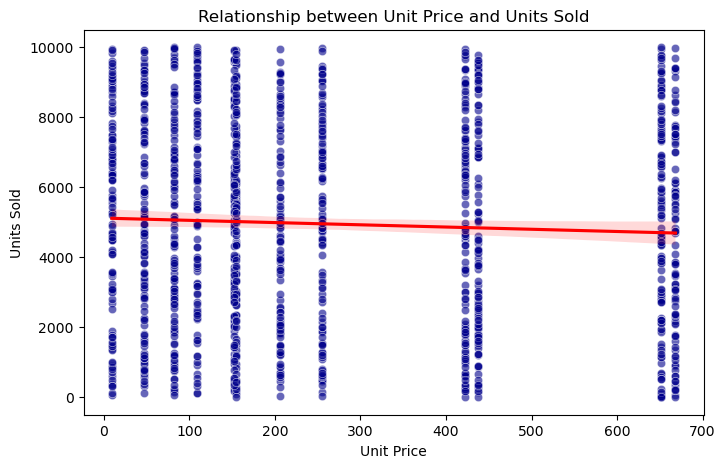

In [8]:
import seaborn as sns

# Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unit_Price', y='Units_Sold', data=df, color='darkblue', alpha=0.6)

# Adding a trend line
sns.regplot(x='Unit_Price', y='Units_Sold', data=df, scatter=False, color='red')
plt.title("Relationship between Unit Price and Units Sold")
plt.xlabel("Unit Price")
plt.ylabel("Units Sold")
plt.show()


### Result Observation:

Relationship between Unit_Price and Units_Sold is linear.

# How Total_Profit vary across different ranges of Units_Sold?

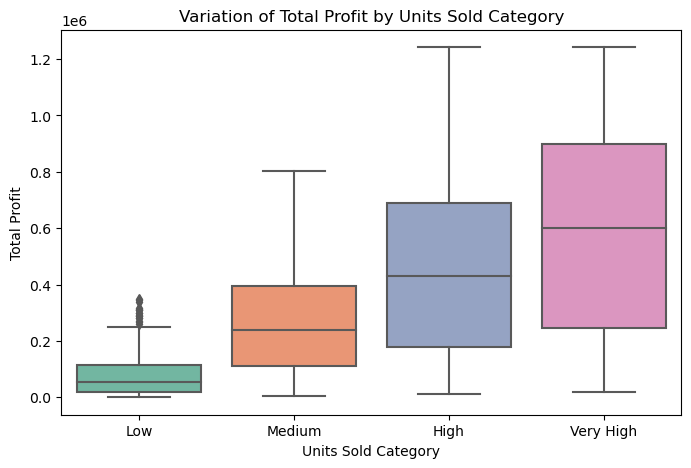

In [9]:
# Binning 'Units_Sold' into categories
bins = [0, 2000, 5000, 8000, 10000]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Units_Sold_Category'] = pd.cut(df['Units_Sold'], bins=bins, labels=labels)

# Creating a box plot to show the variation of Total Profit
plt.figure(figsize=(8, 5))
sns.boxplot(x='Units_Sold_Category', y='Total_Profit', data=df, palette='Set2')
plt.title("Variation of Total Profit by Units Sold Category")
plt.xlabel("Units Sold Category")
plt.ylabel("Total Profit")
plt.show()


### Result Observation:

As observed that low units sold have some outliers which means that there must some products which have large profit margins.

Over-all the relationship between Total_Profit and Units_Sold is also linear as many units were sold so the total prfit is high.

# The average Total_profit per Country.

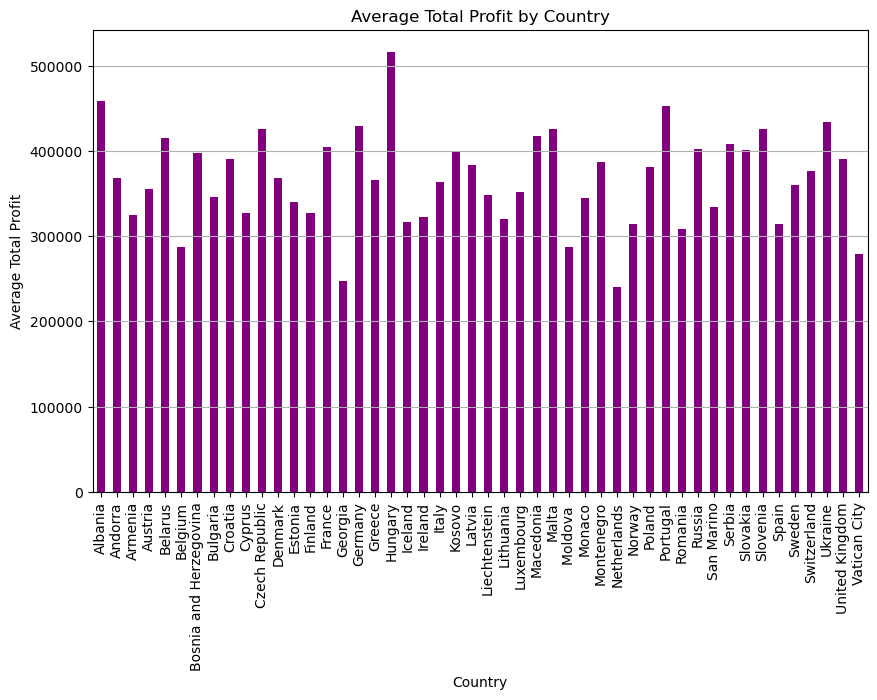

In [10]:
# Calculate the average Total Cost for each region
avg_cost_by_region = df.groupby('Country')['Total_Profit'].mean()

# Plotting the results
avg_cost_by_region.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Average Total Profit by Country")
plt.xlabel("Country")
plt.ylabel("Average Total Profit")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


### Results for Observation

The country having Highiest Average Total Profit is Hungary and then Albania

# Analysing correlations between key financial metrics.

F:\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


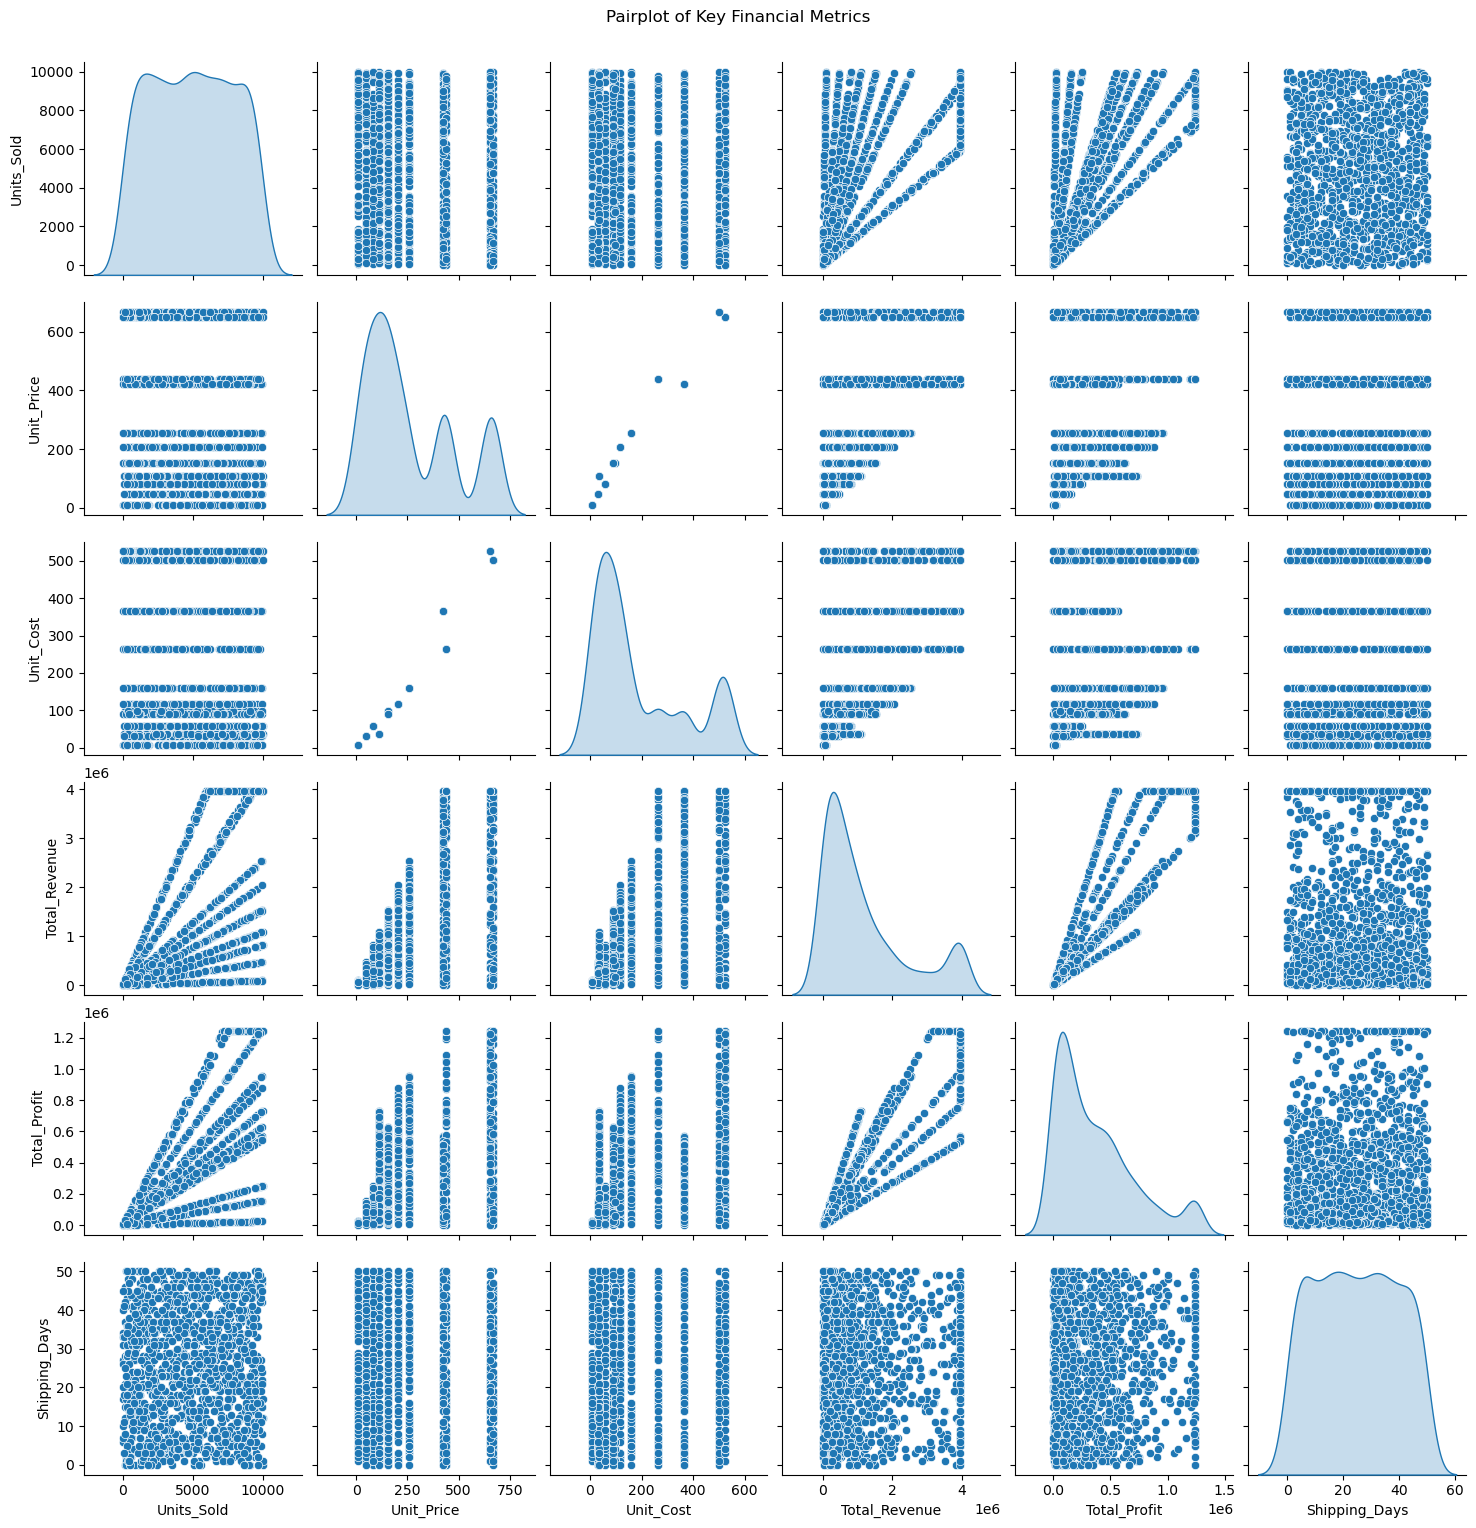

In [11]:
# Pairplot to show correlations between financial metrics
sns.pairplot(df[['Units_Sold', 'Unit_Price', 'Unit_Cost', 'Total_Revenue', 'Total_Profit','Shipping_Days']], diag_kind='kde')
plt.suptitle("Pairplot of Key Financial Metrics", y=1.02)
plt.show()


# Corelation Using Heatmap

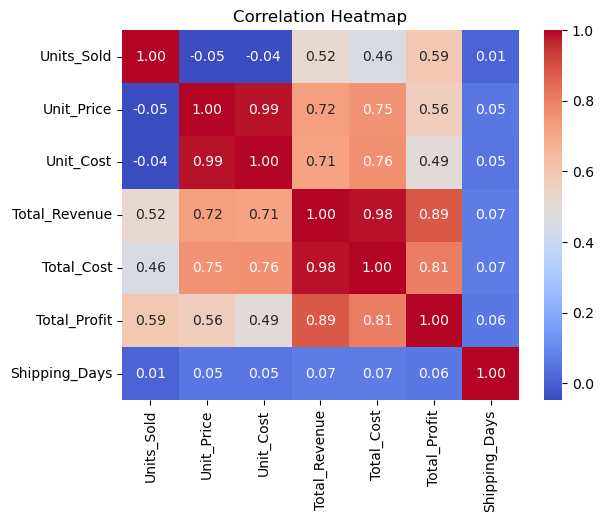

In [12]:
corr_matrix = df[['Units_Sold', 'Unit_Price', 'Unit_Cost', 'Total_Revenue','Total_Cost', 'Total_Profit','Shipping_Days']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Results For Obsevation

Unit_cost and Unit_price has the highest correlation

Also the result shows a noteable correlation between Total Cost and Total Profit

# Counting the total number of orders in each country

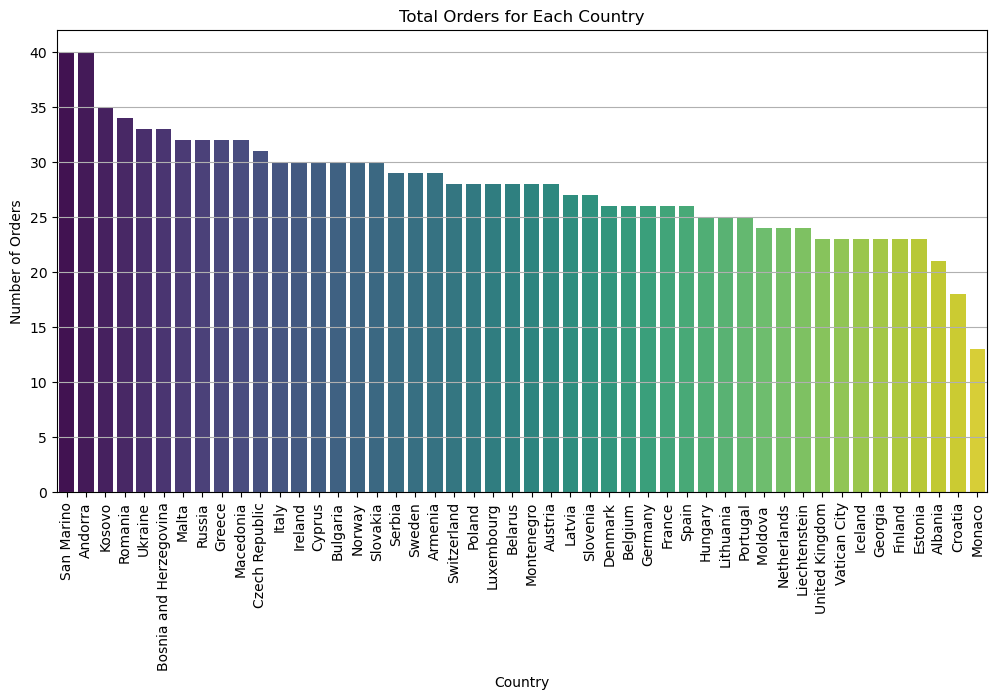

In [13]:

orders_per_country = df.groupby('Country')['Order_ID'].nunique().sort_values(ascending=False)

# Plotting the total orders for each country
plt.figure(figsize=(12, 6))                    # setting fig size
sns.barplot(x=orders_per_country.index, y=orders_per_country.values, palette='viridis')
plt.xticks(rotation=90)                         # Rotating country names for better readability
plt.title("Total Orders for Each Country")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()


### Observation Results

**The highiest no.of orders are in San Marino and Andorra**

# Observing the Shipping days for each country

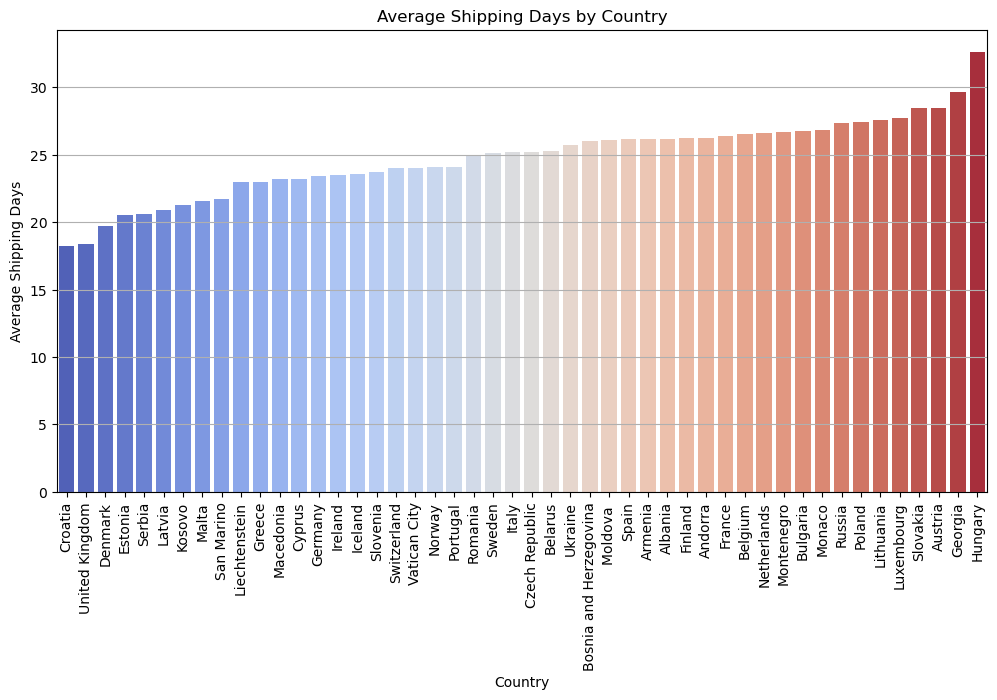

In [14]:
# Calculating the average shipping days
avg_shipping_days = df.groupby('Country')['Shipping_Days'].mean().sort_values()

# Plotting the average shipping days for each country
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_shipping_days.index, y=avg_shipping_days.values, palette='coolwarm')

plt.xticks(rotation=90)                     
plt.title("Average Shipping Days by Country")

plt.xlabel("Country")
plt.ylabel("Average Shipping Days")
plt.grid(axis='y')

plt.show()


#### As you can observe that the country ship the product in few days is Croatia and United Kindom or in other words we can say that fastes shipping rate is in Croatia and then in United kingdom.

# Analysing the top selling Item_types

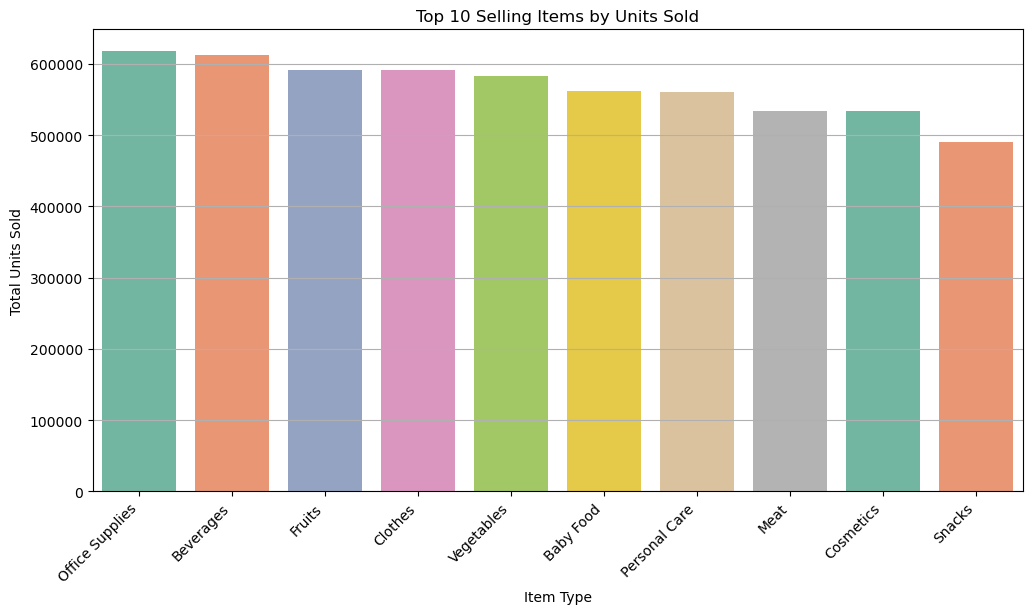

In [15]:
# Total units sold for each item type
total_units_sold = df.groupby('Item_Type')['Units_Sold'].sum().sort_values(ascending=False)

# Select the top 10 selling items
top_selling_items = total_units_sold.head(10)

# Plotting the top-selling items
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_items.index, y=top_selling_items.values, palette='Set2')
plt.xticks(rotation=45, ha='right') 

plt.title("Top 10 Selling Items by Units Sold")
plt.xlabel("Item Type")
plt.ylabel("Total Units Sold")
plt.grid(axis='y')

plt.show()


# Top Selling Items in each country

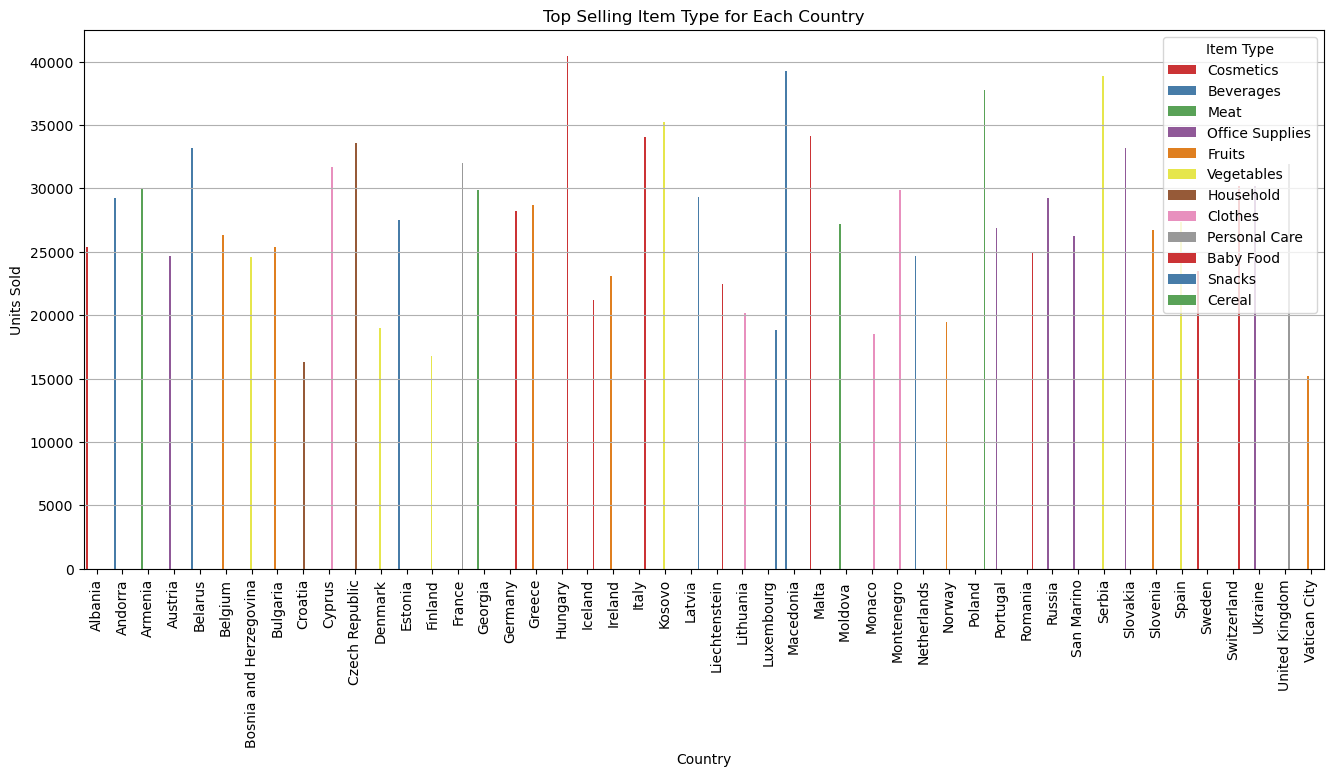

In [17]:
# Group by 'Country' and 'Item_Type', then sum the 'Units_Sold'
country_item_sales = df.groupby(['Country', 'Item_Type'])['Units_Sold'].sum().reset_index()


# Sorting by 'Country' and 'Units_Sold' to find the top-selling items for each country
top_selling_items = country_item_sales.sort_values(by=['Country', 'Units_Sold'], ascending=[True, False])


# Getting the top-selling item for each country using drop_duplicates (keeping the first, which is the top seller)
top_selling_per_country = top_selling_items.drop_duplicates(subset=['Country'], keep='first')

# Plotting the top-selling item type for each country
plt.figure(figsize=(16, 7))
sns.barplot(x='Country', y='Units_Sold', hue='Item_Type', data=top_selling_per_country, palette='Set1')
plt.xticks(rotation=90)


plt.title("Top Selling Item Type for Each Country")
plt.xlabel("Country")

plt.ylabel("Units Sold")
plt.legend(title="Item Type")

plt.grid(axis='y')

plt.show()


### The above graph shows that which Type of product is selling at top in each country.

### Through this graph client can make it's strategy to invest in a product which sells easily in his region.

## Note: The top selling Items in each country doesn't make any alarm that the Item_Type is also Top profitable in that country so for that you can explore the data more and more